# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: KARRA Giovanni 45032100

Part. 2: AYDIN Matya 37592100

Part. 3: MATHY Sacha 40062100

Part. 4: LEBOUTTE Pierre 43302100

Part. 5:

Part. 6:

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


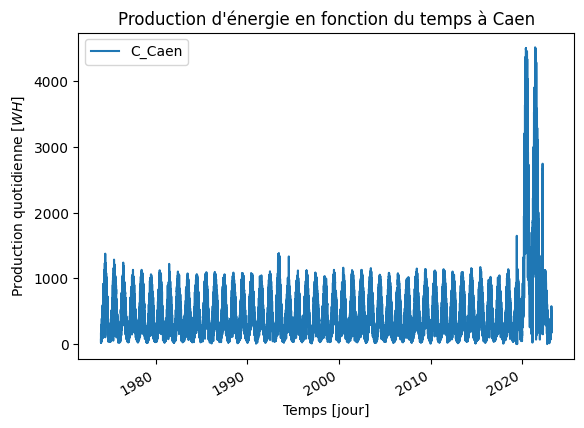

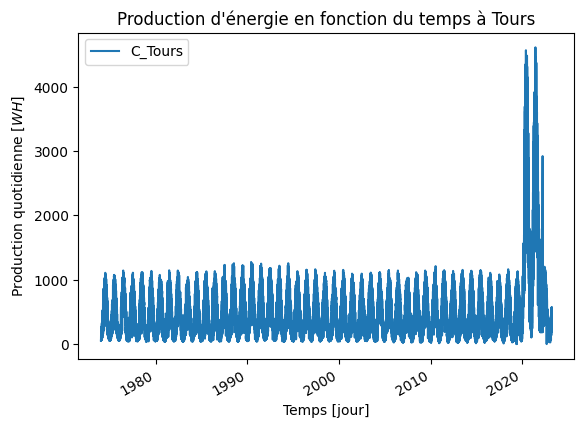

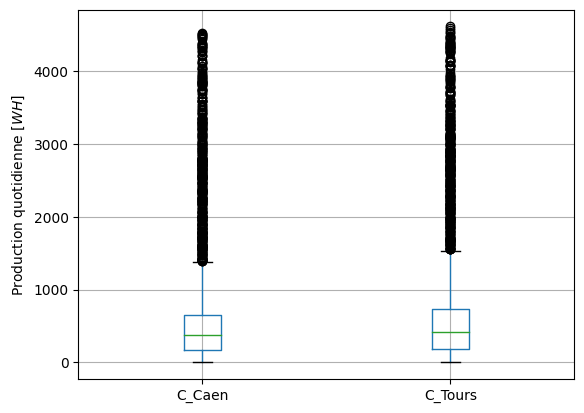

Before removing outliers:  (17789, 6)
After removing outliers:  (17330, 6)


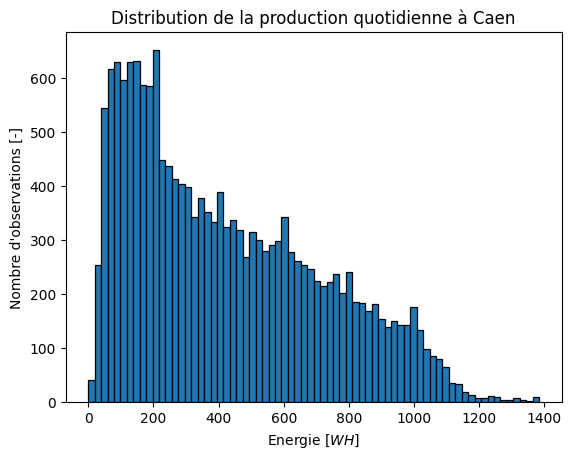

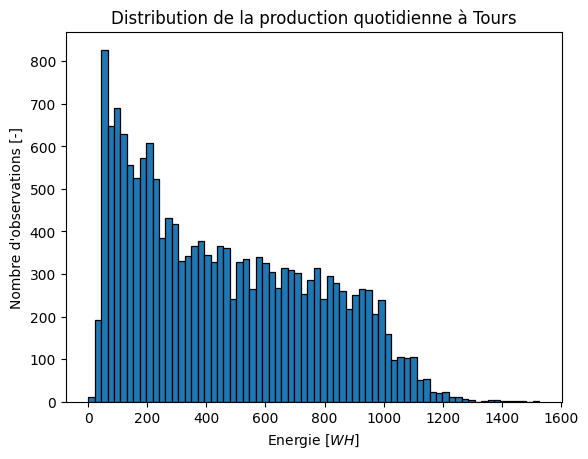

In [1]:
#Imports necessary packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#places data into a DataFrame and:
df = pd.read_csv("Radiation.csv")

#casts DATE column into datetime datatype:
df["DATE"] = df["DATE"].apply(str)
df["DATE"] = pd.to_datetime(df["DATE"])

P_cr = 0.18
f_perf = 0.75

#daily energy production:
df["C_Caen"] = df["Caen"]*24*P_cr*f_perf
df["C_Tours"] = df["Tours"]*24*P_cr*f_perf

#time series plot:
#Caen:

df.plot(kind="line", x="DATE", y=["C_Caen"])
plt.title("Production d'énergie en fonction du temps à Caen")
plt.xlabel("Temps [jour]")
plt.ylabel("Production quotidienne $[WH]$")
plt.show()
#Tours
df.plot(kind="line", x="DATE", y=["C_Tours"])
plt.title("Production d'énergie en fonction du temps à Tours")
plt.xlabel("Temps [jour]")
plt.ylabel("Production quotidienne $[WH]$")
plt.show()

#boxplot :
df.boxplot(column=["C_Caen", "C_Tours"])
plt.ylabel("Production quotidienne $[WH]$")
plt.show()

#quantiles computation:
Caen_q_25 = np.quantile(df["C_Caen"], 0.25)
Caen_q_75 = np.quantile(df["C_Caen"], 0.75)

Tours_q_25 = np.quantile(df["C_Tours"], 0.25)
Tours_q_75 = np.quantile(df["C_Tours"], 0.75)

#iqr:
Caen_iqr = Caen_q_75 - Caen_q_25
Tours_iqr = Tours_q_75 - Tours_q_25

#removing outliers:
upper_bound_Caen = Caen_q_75 + 1.5*Caen_iqr
lower_bound_Caen = Caen_q_25 - 1.5*Caen_iqr

upper_bound_Tours = Tours_q_75 + 1.5*Tours_iqr
lower_bound_Tours = Tours_q_25 - 1.5*Tours_iqr


#drops outliers in both Caen and Tours
#compares size:
print("Before removing outliers: ", df.shape)
df = df.drop(df[(df["C_Caen"]<=lower_bound_Caen) | (df["C_Caen"]>=upper_bound_Caen) | (df["C_Tours"]<=lower_bound_Tours) | (df["C_Tours"]>=upper_bound_Tours)].index)
print("After removing outliers: ", df.shape)


#histogram:
#Caen:
plt.hist(df["C_Caen"], bins=70, edgecolor='black', linewidth=0.9)
plt.title("Distribution de la production quotidienne à Caen")
plt.xlabel("Energie $[WH]$")
plt.ylabel("Nombre d'observations [-]")
plt.show()

#Tours:
plt.hist(df["C_Tours"], bins=70, edgecolor='black', linewidth=0.9)
plt.title("Distribution de la production quotidienne à Tours")
plt.xlabel("Energie $[WH]$")
plt.ylabel("Nombre d'observations [-]")
plt.show()





Suite à une analyse graphique du boxplot, nous constatons une disparité importante (supérieure à celle du iqr) pour les 2 villes.

---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [2]:


daily_production_average = [[0]*12, [0]*12]
daily_production_median = [[0]*12, [0]*12]
daily_production_std = [[0]*12, [0]*12]
daily_production_5th = [[0]*12, [0]*12]
daily_production_95th = [[0]*12, [0]*12]

for i in range(2):
    city = "C_Caen" if i == 0 else "C_Tours"
    for j in range(1, 13):
        mask = df["DATE"].dt.month == j
        daily_production_average[i][j-1] = np.round(np.mean(df[mask][city]), 2)
        daily_production_median[i][j-1] = np.round(df[mask][city].median(), 2)
        daily_production_std[i][j-1] = np.round(df[mask][city].std(), 2)
        daily_production_5th[i][j-1] = np.round(df[mask][city].quantile(0.05), 2)
        daily_production_95th[i][j-1] = np.round(df[mask][city].quantile(0.95), 2)

data = np.transpose([["Janvier", "Fevrier", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout",
                                  "Septembre", "Octobre", "Novembre", "Decembre"]] +
    daily_production_average + daily_production_median + daily_production_std + daily_production_5th +
    daily_production_95th)

months_table = pd.DataFrame(data, columns=["Month", "Average Caen", "Average Tours",
                                           "Median Caen", "Median Tours", "Std Caen", "Std Tours",
                                           "5th Caen", "5th Tours", "95th Caen", "95th Tours"])

print(months_table)

        Month Average Caen Average Tours Median Caen Median Tours Std Caen  \
0     Janvier       146.88        158.13      123.12       123.12   113.16   
1     Fevrier        250.5        273.32      223.56       236.52   169.34   
2        Mars       377.94        417.67      359.64       414.72   186.51   
3       Avril       560.37        600.15      573.48       622.08   210.45   
4         Mai       677.08        705.47      703.08       735.48    255.1   
5        Juin       736.64        792.38      751.68        826.2   265.88   
6     Juillet       725.44         790.5      738.72       829.44   241.36   
7        Aout        623.1        699.66      638.28       727.38   198.02   
8   Septembre       459.98        514.46      466.56       531.36   168.79   
9     Octobre       282.71        313.05      268.92       301.32   154.38   
10   Novembre       173.03        191.57      155.52        162.0   124.77   
11   Decembre       114.46         123.7      100.44       100.4

Commentaires :

Tours a une plus grande production que Caen tout au long de l'année, et l'écart est accentué durant les mois d'été. Ceci peut être observé sur tous les types de mesures, tant sur la moyenne que sur les différents percentiles.

Tours a une distribution légèrement plus large, comme on peut l'oberver avec son écart type plus élévé par rapport à Caen.

Ceci peut évidemment être expliqué par la position géographique plus au sud de Tours par rapport à Caen.

Ces valeurs peuvent également être comparées aux valeurs globales qui sont fournies ci-dessous:

In [3]:
print(df["C_Caen"].describe())

print(df["C_Tours"].describe())

count    17330.000000
mean       421.970458
std        292.340510
min          0.000000
25%        168.480000
50%        359.640000
75%        631.800000
max       1383.480000
Name: C_Caen, dtype: float64
count    17330.000000
mean       459.139035
std        309.634145
min          0.000000
25%        184.680000
50%        405.000000
75%        709.560000
max       1526.040000
Name: C_Tours, dtype: float64


Comme attendu, les mois chauds sont au-dessus de la moyenne globale et les mois froids en dessous pour les 2 villes.

---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


LL gamma, Caen:  -9635.883766471161
LL normal, Caen: -9549.38685406591
LL gamma, Tours:  -9737.796865103606
LL normal, Tours: -9649.520623487704
ll_gamma_caen < ll_norm_caen, we choose the normal distribution for Caen
ll_gamma_Tours < ll_norm_Tours, we choose the normal distribution for Tours


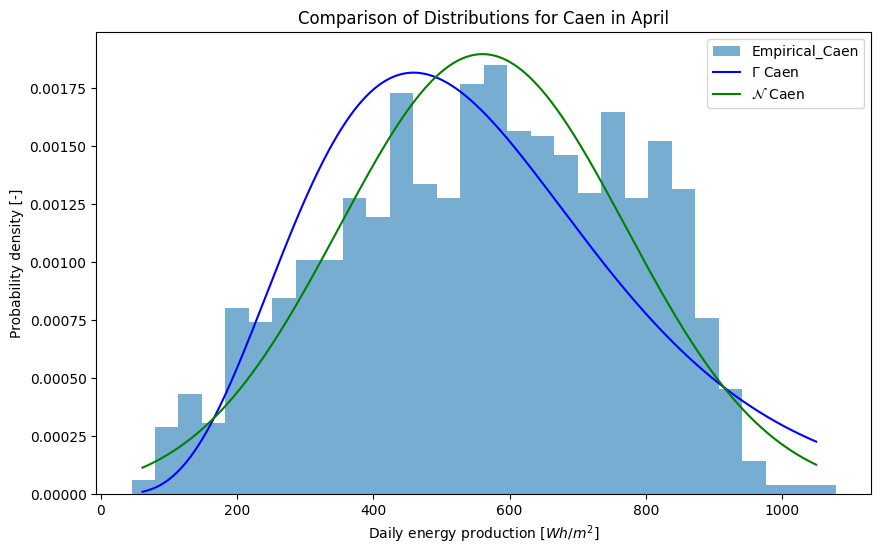

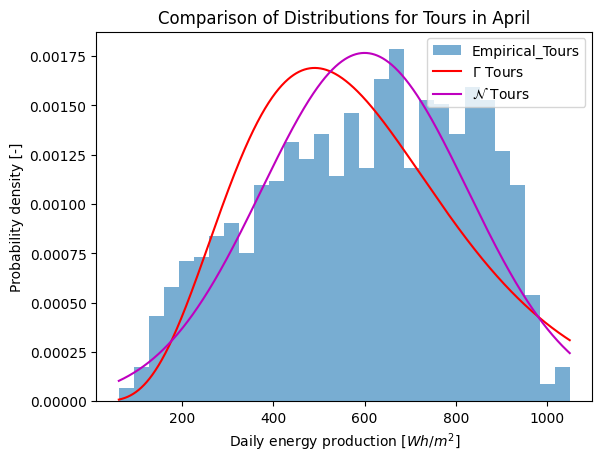

In [4]:
#keeps April only:
mask = (df["DATE"].dt.month == 4)
df_april = df[mask]

from scipy.stats import gamma, norm

#1)

# Ajuster une distribution gamma
params_gamma_caen = gamma.fit(df_april['C_Caen'], floc=-0.001)
params_gamma_tours = gamma.fit(df_april['C_Tours'], floc=-0.001)

# Ajuster une distribution normale
params_norm_caen = norm.fit(df_april['C_Caen'])
params_norm_tours = norm.fit(df_april['C_Tours'])

#2)

# Calculer la log-vraisemblance pour la distribution gamma
ll_gamma_caen = np.sum(gamma.logpdf(df_april['C_Caen'], *params_gamma_caen))
ll_gamma_tours = np.sum(gamma.logpdf(df_april['C_Tours'], *params_gamma_tours))

# Calculer la log-vraisemblance pour la distribution normale
ll_norm_caen = np.sum(norm.logpdf(df_april['C_Caen'], *params_norm_caen))
ll_norm_tours = np.sum(norm.logpdf(df_april['C_Tours'], *params_norm_tours))

print("LL gamma, Caen: ", ll_gamma_caen)
print('LL normal, Caen:', ll_norm_caen)
print("LL gamma, Tours: ", ll_gamma_tours)
print('LL normal, Tours:', ll_norm_tours)

#Choisir les distributions qui maximisent la LL:
if ll_gamma_caen > ll_norm_caen:
    print("ll_gamma_caen > ll_norm_caen, we choose the gamma distribution for Caen")
else:
    print("ll_gamma_caen < ll_norm_caen, we choose the normal distribution for Caen")

if ll_gamma_tours > ll_norm_tours:
    print("ll_gamma_tours > ll_norm_tours, we choose the gamma distribution for Tours")
else:
    print("ll_gamma_Tours < ll_norm_Tours, we choose the normal distribution for Tours")



#3)

# Créer un espace pour les x
x = np.linspace(min(df_april['C_Caen']), max(df_april['C_Caen']), 1000)
x = np.linspace(min(df_april['C_Tours']), max(df_april['C_Tours']), 1000)

# Tracer pour Caen
plt.figure(figsize=(10, 6))
plt.hist(df_april['C_Caen'], density=True, bins=30, alpha=0.6, label="Empirical_Caen")
plt.plot(x, gamma.pdf(x, *params_gamma_caen), 'b-', label="$\Gamma$ Caen ")
plt.plot(x, norm.pdf(x, *params_norm_caen), 'g-', label="$\mathcal{N}$ Caen")

plt.title("Comparison of Distributions for Caen in April")
plt.xlabel("Daily energy production $[Wh/m^2]$")
plt.ylabel("Probability density [-]")
plt.legend()
plt.show()

#Tracer pour Tours:
plt.hist(df_april['C_Tours'], density=True, bins=30, alpha=0.6, label="Empirical_Tours")
plt.plot(x, gamma.pdf(x, *params_gamma_tours), 'r-', label="$\Gamma$ Tours")
plt.plot(x, norm.pdf(x, *params_norm_tours), 'm-', label="$\mathcal{N}$ Tours")

plt.title("Comparison of Distributions for Tours in April")
plt.xlabel("Daily energy production $[Wh/m^2]$")
plt.ylabel("Probability density [-]")
plt.legend(loc = 'upper right')
plt.show()

Pour chaque ville, on prend la distribution qui maximise la log-likelihood. Celle-ci correspond à la loi normale dans les 2 situations.

4) Le paramètre supplémentaire floc permet de fixer un point de départ au solver. Cela permet une meilleure estimation des paramètres  et d'accélérer les calculs si l'heuristique fournie  est bonne.

---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Note: we consider $\mu_{Caen} \neq \mu_{Tours}$, i.e a 2 sided-test.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [5]:
#code here


import scipy.stats as sc


#rejection region:
alpha = 0.05

n = df_april.shape[0]
dat_Caen = df_april['C_Caen'].values
dat_Tours = df_april['C_Tours'].values

#Empirical means:
mean_Caen = np.mean(dat_Caen)
mean_Tours = np.mean(dat_Tours)



#Empirical std's:
S_Caen = np.std(dat_Caen, ddof=1)
S_Tours = np.std(dat_Tours, ddof=1)



Spool = np.sqrt(((n - 1)*S_Caen**2 + (n - 1)*S_Tours**2)/(n + n - 2))

#compute t_obs:

t_obs = (mean_Caen - mean_Tours)/(Spool * np.sqrt(1/n + 1/n))
pval = 2*sc.t.cdf( t_obs, df= n + n - 2) #*2 as it is a 2-sided test

print("pval = ", pval)

f_l   = sc.t.ppf(q=1-alpha/2,df = n + n - 2)
f_u   = sc.t.ppf(q=alpha/2,df = n + n - 2)
print("t_obs = ", t_obs)
print("2.5; 97.5 percent interval = ",[f_u, f_l])


#second method:
Txbis , pvalbis=sc.ttest_ind(dat_Caen, dat_Tours, axis=0, equal_var=True)
print("pvalbis = ", pvalbis)

if pval < f_l or pval > f_u:
    print("t_obs is in the rejection region, we reject H_0")

else:
    print("t_obs is not in the rejection region, we cannot reject H_0")

pval =  1.3724062193154514e-06
t_obs =  -4.839401221201778
2.5; 97.5 percent interval =  [-1.960805570510904, 1.9608055705109035]
pvalbis =  1.3724062193154514e-06
t_obs is in the rejection region, we reject H_0


Les hypothèses du test d'hypothèse entre 2 distributions sont les suivantes:
* *Les 2 populations sont gaussiennes*: cela a été déterminé au point précédent.

* *Les 2 populations sont de même variance*: les variances théoriques sont inconnues. Cette hypothèse reste à vérifier. Le point suivant permettra de l'accepter ou de la rejeter. Si $\sigma_{Caen} \neq \sigma_{Tours}$, on ne pourra pas utiliser le résultat de ce test d'hypothèse.

* *Les 2 populations sont i.i.d.:* Etant donné l'éloignement géographique des 2 villes, on peut considérer que les 2 populations sont indépendantes.



---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.

Note: we consider $H_1$: $\sigma_{Caen} \neq\sigma_{Tours}$, i.e a 2-sided test.


In [6]:
#code here

#First method:

Tx =S_Caen**2/S_Tours**2

#pvalue:
pval = 2*sc.f.cdf(Tx,dfn=n-1 , dfd=n-1)  #*2 since we consider a 2-sided test
print("pval = ", pval)

#computes the alpha/2 ; 1- alpha/2 interval:
f_l   = sc.f.ppf(q=1-alpha/2,dfn=n-1, dfd=n-1)
f_u   = sc.f.ppf(q=alpha/2,dfn=n-1, dfd=n-1)
print("Tx = ", Tx)
print("2.5; 97.5 percent interval = ",[f_u, f_l])

if pval < f_l or pval > f_u:
    print("Tx is in the rejection region, we reject H_0")

else:
    print("Tx is not in the rejection region, we cannot reject H_0")

#second method:
Txbis , pvalbis= sc.bartlett(dat_Caen, dat_Tours)
print('pvalbis = ', pvalbis)





pval =  0.007740103465323561
Tx =  0.8676793424183125
2.5; 97.5 percent interval =  [0.9008337665507181, 1.1100827223972611]
Tx is in the rejection region, we reject H_0
pvalbis =  0.007740106097286402


Etant donné que nous devons rejeter $H_0$, on ne peut pas utiliser le résultat du test d'hypothèse réalisé en 2.2

---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 





Le test de Wilcoxon teste l'hypothèse nulle: $H_0$: $X = Y$. Avec $X$ et $Y$, 2 distributions.

Comme déterminé en 2.1, dans le cadre de notre projet, nous testons $H_0$: $\mathcal{N}(\mu_{Caen}, \sigma_{Caen}) = \mathcal{N}(\mu_{Tours}, \sigma_{Tours})$

Contrairement au t-test, le test de wilcowon n'a pas besoin de l'hypothèse que X et Y soient normelement distribuées. En particulier, nous n'avons également pas besoin de l'hypothèse d'égalité des variances: $\sigma_{Caen} = \sigma_{Tours}$ qui a été rejetée en 2.3.

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [7]:
#code here

#Compute wilcoxon test by 2 methods since results can vary with approximations (see scipy.stats.wilcoxon page):

# 1) pass both samples to sc.wilcoxon:
wilcox = sc.wilcoxon(x= df_april["C_Caen"], y= df_april["C_Tours"])
print("Method 1: pval = ", wilcox.pvalue)

# 2) pass samples difference to sc.wilcoxon:
diff = df_april["C_Caen"] - df_april["C_Tours"]
wilcoxdiff = sc.wilcoxon(x= diff.values)
print("Method 2: pval = ", wilcoxdiff.pvalue)


Method 1: pval =  4.315018106798902e-20
Method 2: pval =  4.315018106798902e-20


Etant donnée que $p_{value}$ $\approx$ 0 avec les 2 méthodes utilisées, nous rejetons l'hypothèse nulle: Les productions quotidiennes d'énergie à Caen et Tours sont donc distribuées avec des paramètres différents: $\mathcal{N}(\mu_{Caen}, \sigma_{Caen}) \neq \mathcal{N}(\mu_{Tours}, \sigma_{Tours})$. On en déduit donc que $\mu_{Caen} \neq \mu_{Tours}$.

---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 43 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


Averages daily productions in Caen for each year : [536.328, 441.71999999999997, 450.03599999999994, 536.76, 436.32, 627.48, 436.42799999999994, 652.5360000000001, 512.136, 457.38000000000005, 562.14, 537.1919999999999, 449.71200000000005, 557.4959999999999, 551.664, 496.58400000000006, 615.4920000000001, 471.4200000000001, 411.4800000000001, 527.472, 635.2559999999999, 446.2560000000001, 498.85200000000003, 465.4800000000001, 473.796, 595.2959999999999, 607.824, 548.532, 506.95200000000006, 519.9119999999999, 620.784, 560.952, 510.08399999999983, 678.4559999999999, 653.6159999999999, 486.5400000000001, 580.824, 537.7319999999999, 636.8760000000001, 504.14400000000006, 613.764, 505.4399999999999, 593.028]
Averages daily productions in Tours for each year : [551.34, 512.784, 489.13199999999995, 540.7560000000001, 558.684, 706.428, 473.796, 683.4240000000001, 574.3439999999998, 463.31999999999994, 699.732, 619.4879999999999, 535.896, 609.1200000000001, 661.2839999999999, 639.36, 536.4359

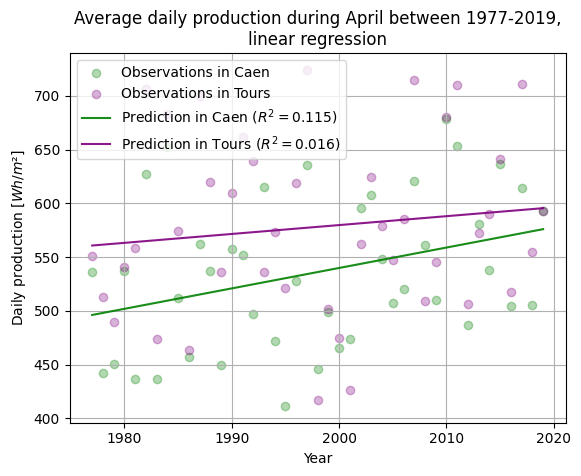

In [8]:
import statsmodels.api as sm 

# Keep only April 1977-2019:
year_start = 1977
year_end = 2019
n = year_end - year_start + 1
mask = (df["DATE"].dt.month == 4) & (df["DATE"].dt.year >= year_start) & (df["DATE"].dt.year <= year_end)
df_april = df[mask]

av_caen = []
av_tours = []

#Computes averages of each year:
for i in range(n):
    av_caen.append(df_april["C_Caen"][i*30:i*30+29].sum()/30)
    av_tours.append(df_april["C_Tours"][i*30:i*30+29].sum()/30)

print("Averages daily productions in Caen for each year :", av_caen)
print("Averages daily productions in Tours for each year :", av_tours)

results_yhats = []
Rsquared = []

# Prediction (inspired by the teacher's code RegressionSpring.py available on Moodle)
for Y in [av_caen, av_tours]:
    X = np.arange(0,n)
    Xm       = sm.add_constant(X)
    results = sm.OLS(Y,Xm).fit()
    #print(results.summary())
    Yhat  = results.predict(Xm)
    X_prime = np.arange(0,n)
    X_prime = sm.add_constant(X_prime)
    y_hat = results.predict(X_prime)
    results_yhats.append(y_hat)
    Rsquared.append(results.rsquared)


plt.scatter(Xm[:,1]+year_start, av_caen, alpha=0.3, color='green', label="Observations in Caen") # Plot the raw data
plt.scatter(Xm[:,1]+year_start, av_tours, alpha=0.3, color='purple', label="Observations in Tours") # Plot the raw data
plt.plot(X_prime[:,1]+year_start, results_yhats[0], 'green', alpha=0.9, label="Prediction in Caen ($R^2 = %.3f$)"%Rsquared[0]) # Add the regression line
plt.plot(X_prime[:,1]+year_start, results_yhats[1], 'purple', alpha=0.9, label="Prediction in Tours ($R^2 = %.3f$)"%Rsquared[1]) # Add the regression line
plt.title('Average daily production during April between 1977-2019,\nlinear regression')
plt.xlabel("Year")
plt.ylabel("Daily production $[Wh/m²]$")
plt.grid(True)
plt.legend()
plt.show()



The R² value is quite low for both cities, which means the majority of the variance is not explained by the model. Thus we can conclude a linear regression is NOT the most suitable model for this application.

---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [23]:
# Imports
import statsmodels.api as sm

#------------Extract the relevant data for Caen
mask_train = (df["DATE"].dt.year >= 1977)& (df["DATE"].dt.year <= 2010)
mask_validation = (df["DATE"].dt.year >= 2011)& (df["DATE"].dt.year <= 2019)
data_train = df[mask_train]["C_Caen"].values
data_validation = df[mask_validation]["C_Caen"].values

#------------ Define the autoregressive model
p = 10 # Number of lag 
X_train =np.zeros((len(data_train)- p, p))
y_train = data_train[p:]

for i in range(p):
    X_train[:, i] = data_train[i:-(p-i)]

X_train = sm.add_constant(X_train)  

#-------------Fit the autoregressive model
model = sm.OLS(y_train, X_train)
results = model.fit()

#----------- Print the results
print(results.summary())

# Calculate the Mean Absolute Error (MAE) on the training set
y_predict_train = results.predict(X_train)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2506.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:08:19   Log-Likelihood:                -80069.
No. Observations:               12285   AIC:                         1.602e+05
Df Residuals:                   12274   BIC:                         1.602e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8373      2.910      8.536      0.0

### Comments

As our objective is to maximize the log likelihood, it becomes apparent that we are dealing with an extremely low log likelihood. Indeed, it is a complex model with a lot of parameter, and the log likelihood is significant when used while comparing models. 

The R-squared, however, gives us a good idea on the fiability of the model. Indeed, here, we have a pretty good R-squared, which can be considered as a proof that our model trained on the set of training data is not bad. 

When comparing models, AIC, BIC, and HQIC are three criteria typically employed for model comparisons. Unfortunately, we lack a point of comparison in this context.

Lastly, it is worth noting that the relatively low lag (10) relative to the size of the sample leads us to the conclusion that the model is of minimal interest. Increasing the lag is a method to obtain a more accurate estimation, as it would be based on a larger sample.

---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

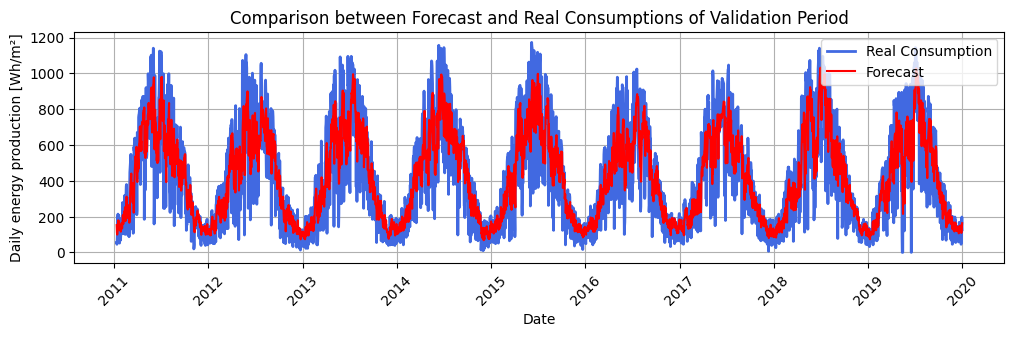

In [24]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#------------- Apply the model on the validation set
data_validation = df[mask_validation]["C_Caen"].values
X_validation = np.zeros((len(data_validation) - p, p))
y_validation = data_validation[p:]

for i in range(p):
    X_validation[:, i] =data_validation[i:-(p-i)]

X_validation =sm.add_constant(X_validation) 

#---------- Calculate the forecast
forecast =results.predict(X_validation)

#----------- Plot real consumptions and the forecast
plt.figure(figsize=(12, 3))
plt.plot(df[mask_validation]["DATE"].values[p:],data_validation[p:], label="Real Consumption", color='royalblue', linewidth=2)
plt.plot(df[mask_validation]["DATE"].values[p:], forecast, label="Forecast", color='red')

plt.title('Comparison between Forecast and Real Consumptions of Validation Period')
plt.xlabel('Date')
plt.ylabel("Daily energy production [Wh/m²]")
plt.grid(True)

plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


Our model demonstrates a strong fit with the validation set, affirming the high R-squared value and its accuracy.

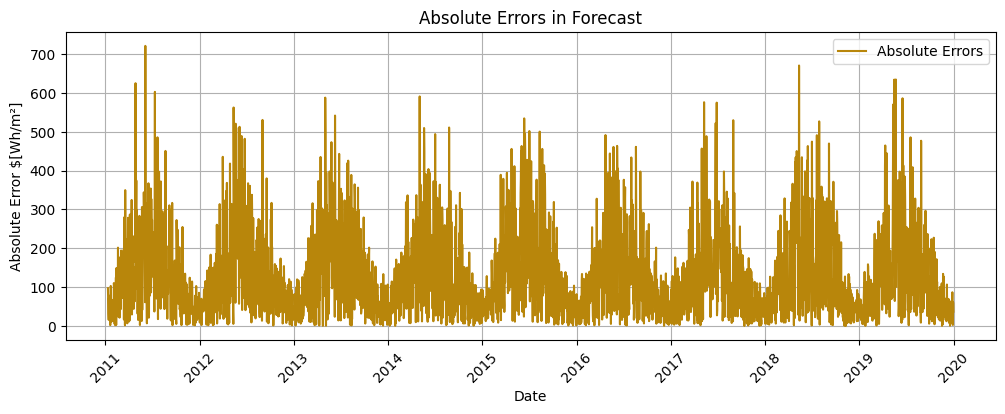

In [25]:
#------------- Calculate and plot the absolute errors
errors = np.abs(forecast -data_validation[p:])
plt.figure(figsize=(12, 4))
plt.plot(df[mask_validation]["DATE"].values[p:],errors,label="Absolute Errors",color='darkgoldenrod')

plt.title('Absolute Errors in Forecast')
plt.xlabel('Date')
plt.ylabel("Absolute Error $[Wh/m²]")
plt.grid(True)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


While our forecasting model may occasionally show deviations in predicting energy consumption, these errors stem from a multitude of factors, many of which are linked to the inherent limitations of the model itself, such as its inability to precisely forecast daily weather conditions. Nevertheless, as we shall soon discover in the upcoming point, the Mean Absolute Error (MAE) remains quite low.

In [26]:
mae_validation = np.mean(errors)
r2_validation = 1 - (np.sum(errors**2) / np.sum((data_validation[p:] - np.mean(data_validation[p:]))**2))

print(f"Mean Absolute Error (MAE) on the validation set: {mae_validation:.2f} WH/m²")
print(f"R-squared (𝑅²) on the validation set: {r2_validation:.2f}")


Mean Absolute Error (MAE) on the validation set: 124.56 WH/m²
R-squared (𝑅²) on the validation set: 0.68


The Mean Absolute Error (MAE) of 124.56 WH/m² on the validation set indicates that, on average, our model's predictions deviate by approximately 124.56 WH/m² from the actual values. The R-squared (𝑅²) score of 0.68 signifies that our model accounts for about 68% of the variance in the data, suggesting a reasonably good fit but with room for improvement.